## Crude Oil

In [53]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from math import sqrt

In [54]:
df = pd.read_csv('brent_crude_oil_atr_ema_rsi_w.csv')
df = df.dropna()
df = df.tail(560) 
df.info()
print('shape of data', df.shape)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 560 entries, 1240 to 1808
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         560 non-null    object 
 1   Close                        560 non-null    float64
 2   Open                         560 non-null    float64
 3   High                         560 non-null    float64
 4   Low                          560 non-null    float64
 5   Vol.                         560 non-null    int64  
 6   ATR                          560 non-null    float64
 7   EMA_12                       560 non-null    float64
 8   EMA_26                       560 non-null    float64
 9   RSI                          560 non-null    float64
 10  S&P500_Close                 560 non-null    float64
 11  S&P500_ATR                   560 non-null    float64
 12  S&P500_EMA_12                560 non-null    float64
 13  S&P500_EMA_26   

In [55]:
df.head()

,Date,Close,Open,High,Low,Vol.,ATR,EMA_12,EMA_26,RSI,...,CBOE_EMA_12,CBOE_EMA_26,USDI_Close,USDI_ATR,USDI_EMA_12,USDI_EMA_26,USDI_RSI,Weekly_WTI_Contracts,Monthly_WTI_Contracts,WTI_Weekly_to_Monthly_Ratio
1240,13/10/2013,109.94,110.87,111.41,108.71,631180,4.175297,110.050628,109.125561,51.651940,...,1688.803642,1652.677476,79.65,1.111996,80.920008,81.406356,38.578277,1030000.0,5140000.0,0.200389
1241,20/10/2013,106.93,109.96,110.94,106.27,1210000,4.210633,109.570532,108.962927,46.205055,...,1699.726159,1660.612478,79.19,1.091139,80.653853,81.242182,36.413966,919120.0,5140000.0,0.178817
1242,27/10/2013,105.91,107.04,110.16,105.78,1220000,4.222731,109.007373,108.736784,44.492795,...,1709.245211,1668.093035,80.72,1.129629,80.664030,81.203502,47.053699,1220000.0,5140000.0,0.237354
1243,3/11/2013,105.12,105.78,106.58,102.98,1200000,4.178250,108.409316,108.468874,43.158780,...,1718.684409,1675.686143,81.30,1.127513,80.761871,81.210650,50.439241,1230000.0,4510000.0,0.272727
1244,10/11/2013,108.50,105.17,108.96,105.15,662840,4.154089,108.423267,108.471180,50.058159,...,1730.917577,1684.761244,80.85,1.099119,80.775429,81.183935,47.881092,1380000.0,4510000.0,0.305987


In [56]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560 entries, 1240 to 1808
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         560 non-null    datetime64[ns]
 1   Close                        560 non-null    float64       
 2   Open                         560 non-null    float64       
 3   High                         560 non-null    float64       
 4   Low                          560 non-null    float64       
 5   Vol.                         560 non-null    int64         
 6   ATR                          560 non-null    float64       
 7   EMA_12                       560 non-null    float64       
 8   EMA_26                       560 non-null    float64       
 9   RSI                          560 non-null    float64       
 10  S&P500_Close                 560 non-null    float64       
 11  S&P500_ATR                   560 non-null

In [57]:
df.head()

,Date,Close,Open,High,Low,Vol.,ATR,EMA_12,EMA_26,RSI,...,CBOE_EMA_12,CBOE_EMA_26,USDI_Close,USDI_ATR,USDI_EMA_12,USDI_EMA_26,USDI_RSI,Weekly_WTI_Contracts,Monthly_WTI_Contracts,WTI_Weekly_to_Monthly_Ratio
1240,2013-10-13,109.94,110.87,111.41,108.71,631180,4.175297,110.050628,109.125561,51.651940,...,1688.803642,1652.677476,79.65,1.111996,80.920008,81.406356,38.578277,1030000.0,5140000.0,0.200389
1241,2013-10-20,106.93,109.96,110.94,106.27,1210000,4.210633,109.570532,108.962927,46.205055,...,1699.726159,1660.612478,79.19,1.091139,80.653853,81.242182,36.413966,919120.0,5140000.0,0.178817
1242,2013-10-27,105.91,107.04,110.16,105.78,1220000,4.222731,109.007373,108.736784,44.492795,...,1709.245211,1668.093035,80.72,1.129629,80.664030,81.203502,47.053699,1220000.0,5140000.0,0.237354
1243,2013-11-03,105.12,105.78,106.58,102.98,1200000,4.178250,108.409316,108.468874,43.158780,...,1718.684409,1675.686143,81.30,1.127513,80.761871,81.210650,50.439241,1230000.0,4510000.0,0.272727
1244,2013-11-10,108.50,105.17,108.96,105.15,662840,4.154089,108.423267,108.471180,50.058159,...,1730.917577,1684.761244,80.85,1.099119,80.775429,81.183935,47.881092,1380000.0,4510000.0,0.305987


In [58]:
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 560 entries, 2013-10-13 to 2024-09-01
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Close                        560 non-null    float64
 1   Open                         560 non-null    float64
 2   High                         560 non-null    float64
 3   Low                          560 non-null    float64
 4   Vol.                         560 non-null    int64  
 5   ATR                          560 non-null    float64
 6   EMA_12                       560 non-null    float64
 7   EMA_26                       560 non-null    float64
 8   RSI                          560 non-null    float64
 9   S&P500_Close                 560 non-null    float64
 10  S&P500_ATR                   560 non-null    float64
 11  S&P500_EMA_12                560 non-null    float64
 12  S&P500_EMA_26                560 non-null    float64
 13  S

In [59]:
df.head()

,Close,Open,High,Low,Vol.,ATR,EMA_12,EMA_26,RSI,S&P500_Close,...,CBOE_EMA_12,CBOE_EMA_26,USDI_Close,USDI_ATR,USDI_EMA_12,USDI_EMA_26,USDI_RSI,Weekly_WTI_Contracts,Monthly_WTI_Contracts,WTI_Weekly_to_Monthly_Ratio
Date,,,,,,,,,,,,,,,,,,,,,
2013-10-13,109.94,110.87,111.41,108.71,631180,4.175297,110.050628,109.125561,51.651940,1744.5,...,1688.803642,1652.677476,79.65,1.111996,80.920008,81.406356,38.578277,1030000.0,5140000.0,0.200389
2013-10-20,106.93,109.96,110.94,106.27,1210000,4.210633,109.570532,108.962927,46.205055,1759.8,...,1699.726159,1660.612478,79.19,1.091139,80.653853,81.242182,36.413966,919120.0,5140000.0,0.178817
2013-10-27,105.91,107.04,110.16,105.78,1220000,4.222731,109.007373,108.736784,44.492795,1761.6,...,1709.245211,1668.093035,80.72,1.129629,80.664030,81.203502,47.053699,1220000.0,5140000.0,0.237354
2013-11-03,105.12,105.78,106.58,102.98,1200000,4.178250,108.409316,108.468874,43.158780,1770.6,...,1718.684409,1675.686143,81.30,1.127513,80.761871,81.210650,50.439241,1230000.0,4510000.0,0.272727
2013-11-10,108.50,105.17,108.96,105.15,662840,4.154089,108.423267,108.471180,50.058159,1798.2,...,1730.917577,1684.761244,80.85,1.099119,80.775429,81.183935,47.881092,1380000.0,4510000.0,0.305987


In [60]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df[df.columns])

In [61]:
df_scaled = pd.DataFrame(scaled_values, columns=df.columns, index=df.index)

In [62]:
df_scaled.head()

,Close,Open,High,Low,Vol.,ATR,EMA_12,EMA_26,RSI,S&P500_Close,...,CBOE_EMA_12,CBOE_EMA_26,USDI_Close,USDI_ATR,USDI_EMA_12,USDI_EMA_26,USDI_RSI,Weekly_WTI_Contracts,Monthly_WTI_Contracts,WTI_Weekly_to_Monthly_Ratio
Date,,,,,,,,,,,,,,,,,,,,,
2013-10-13,0.879984,0.882260,0.750831,0.904066,0.151351,0.179820,0.964355,0.989022,0.580650,0.000000,...,0.000000,0.000000,0.013482,0.264827,0.032275,0.042861,0.223742,0.173896,0.291548,0.030862
2013-10-20,0.850055,0.873271,0.746607,0.880277,0.395880,0.183841,0.958239,0.986676,0.509022,0.003919,...,0.002880,0.002157,0.000000,0.253506,0.023570,0.036918,0.189545,0.153312,0.291548,0.026689
2013-10-27,0.839912,0.844429,0.739596,0.875500,0.400105,0.185218,0.951064,0.983414,0.486505,0.004380,...,0.005390,0.004191,0.044842,0.274399,0.023903,0.035518,0.357657,0.209168,0.291548,0.038013
2013-11-03,0.832057,0.831983,0.707416,0.848201,0.391656,0.180156,0.943444,0.979549,0.468962,0.006686,...,0.007879,0.006255,0.061841,0.273250,0.027103,0.035777,0.411150,0.211024,0.254447,0.044856
2013-11-10,0.865666,0.825958,0.728809,0.869358,0.164726,0.177407,0.943622,0.979582,0.559692,0.013755,...,0.011105,0.008722,0.048652,0.257837,0.027547,0.034809,0.370730,0.238870,0.254447,0.051290


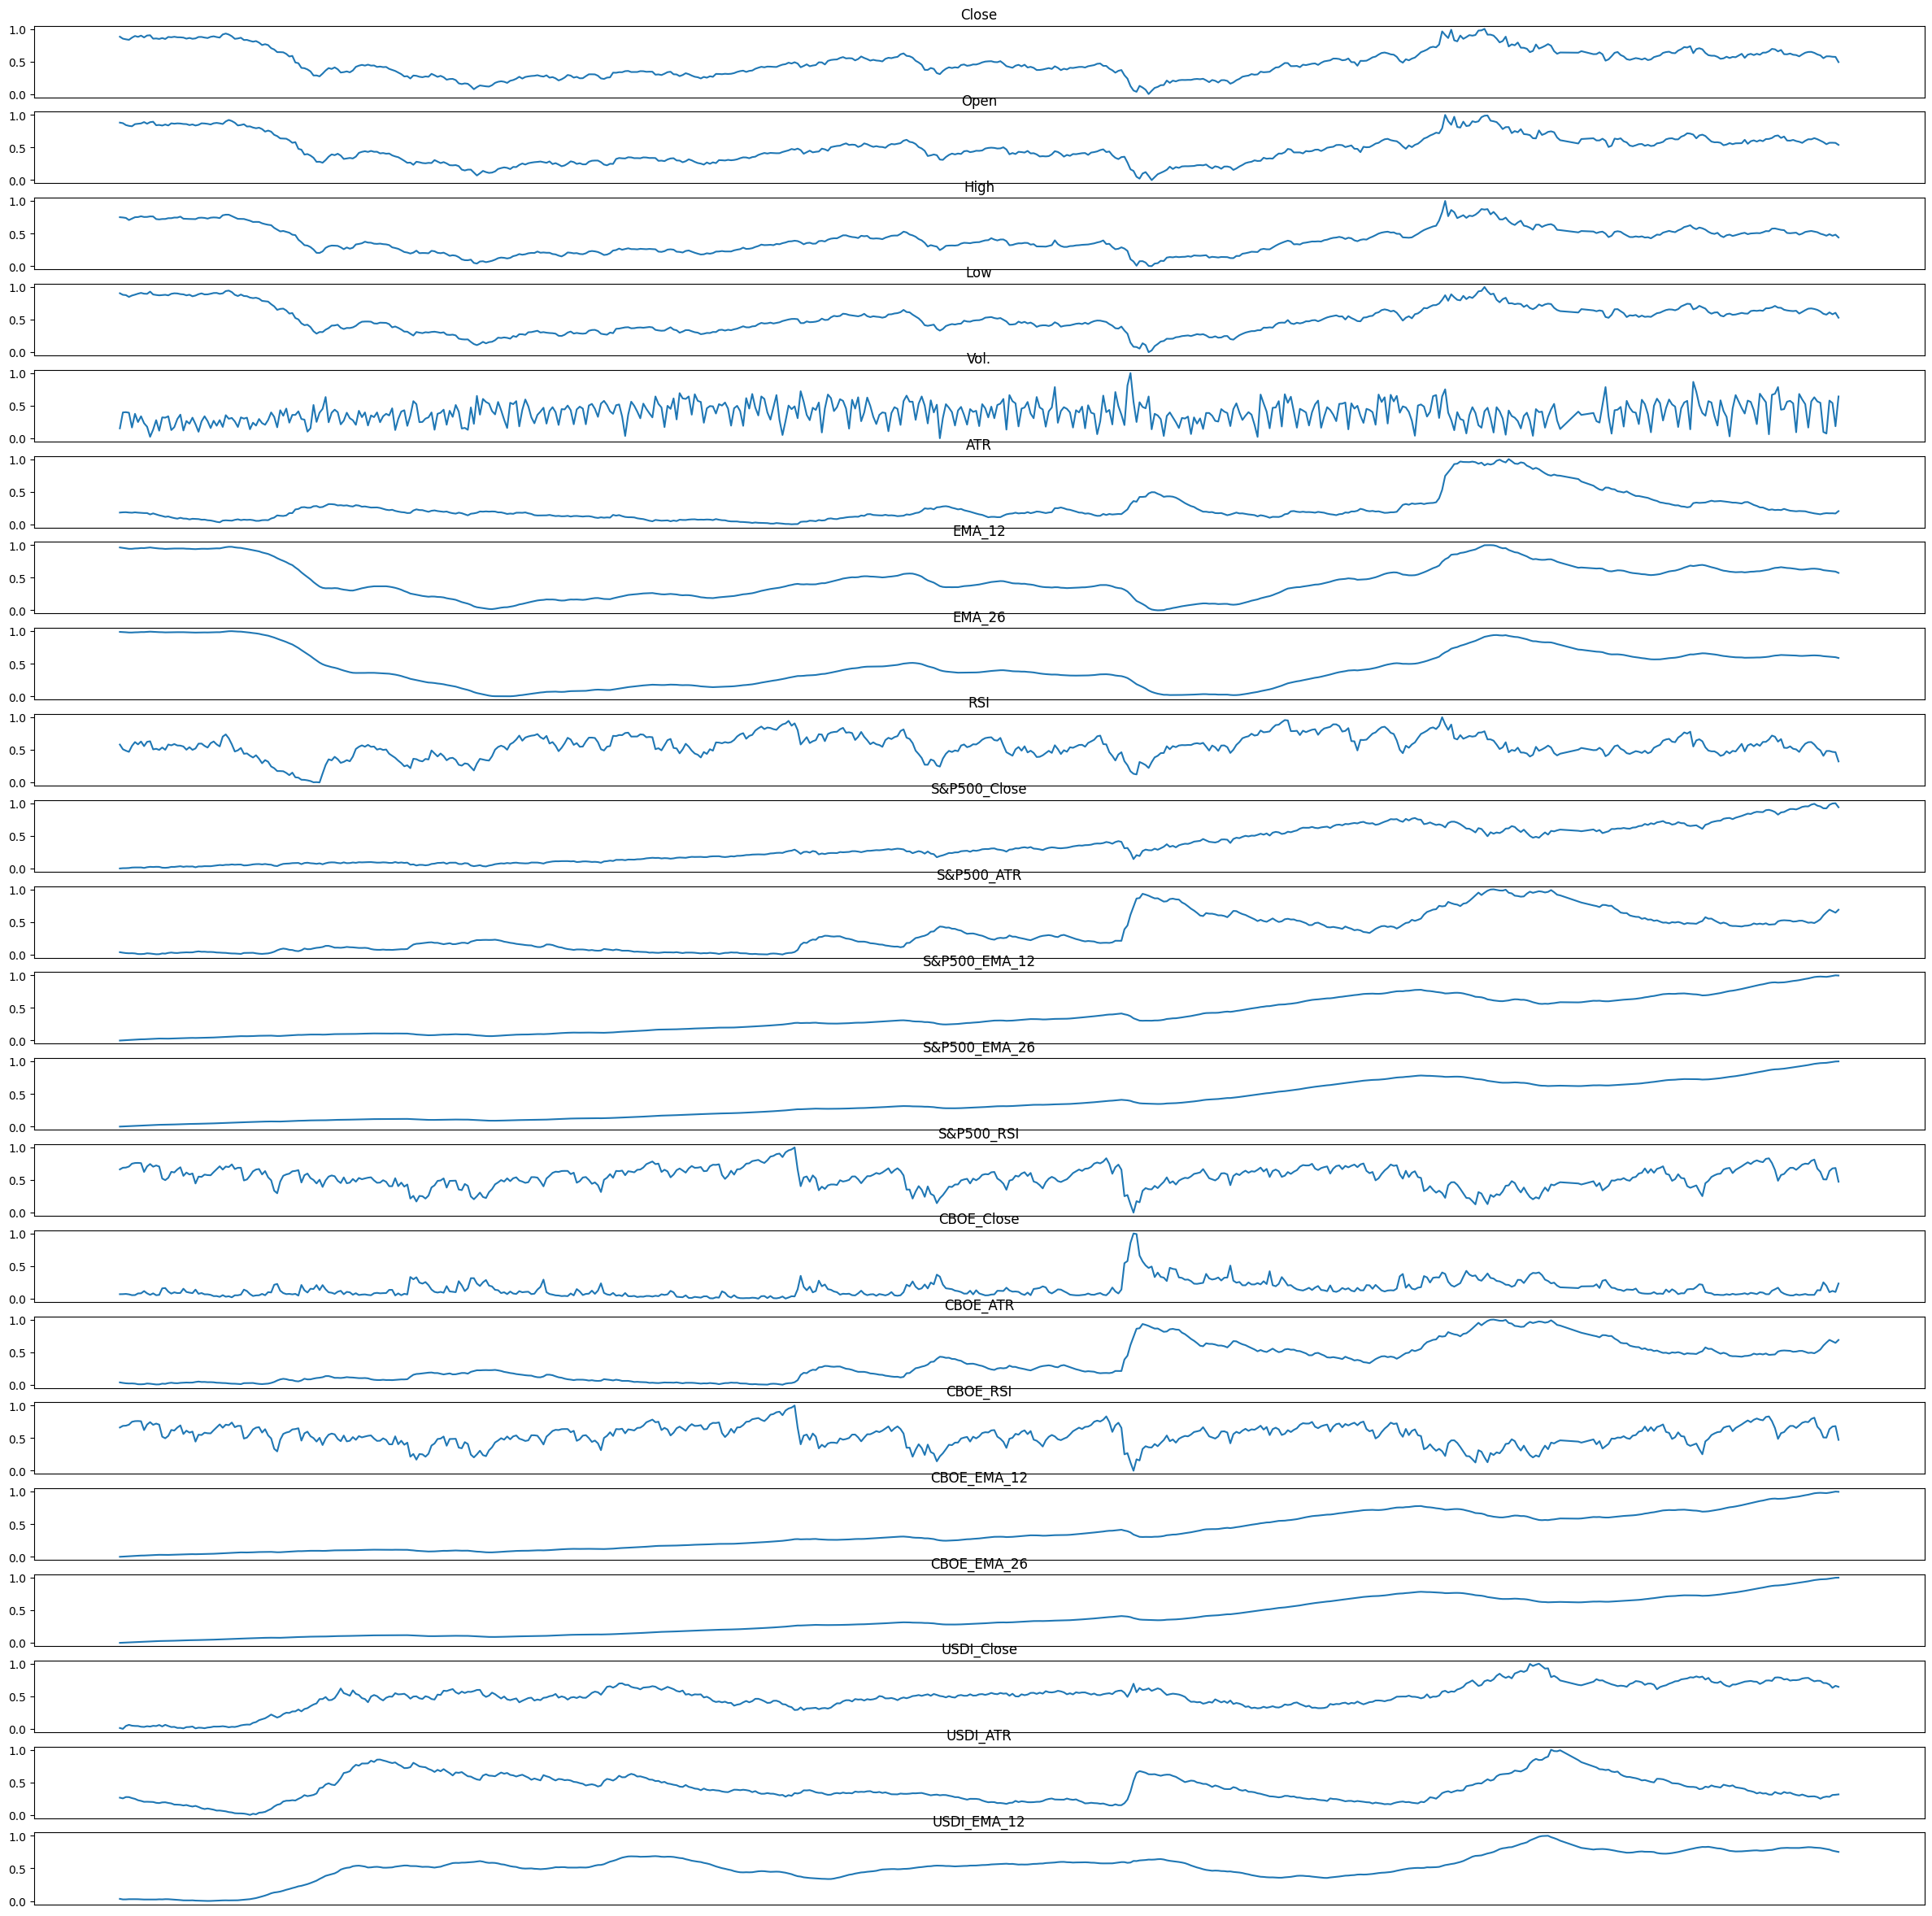

In [63]:
plt.rcParams['figure.figsize'] = (30, 30)
figure, axes = plt.subplots(22)

for ax, col in zip(axes, df_scaled.columns):
    ax.plot(df_scaled[col])
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)

In [64]:
def create_sequence(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        X.append(data.iloc[i-window_size:i].values)
        y.append(data.iloc[i].values)
    return np.array(X), np.array(y)

In [65]:
window_size = 100
X, y = create_sequence(df_scaled, window_size)

In [66]:
X.shape, y.shape

((460, 100, 27), (460, 27))

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_test.shape

((368, 100, 27), (92, 27))

In [68]:
X_train.shape[1], X_train.shape[2]

(100, 27)

In [69]:
y_train.shape[1]

27

In [70]:
model = keras.Sequential([
    # first layer
    keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.Dropout(0.3),

    # second layer
    keras.layers.LSTM(units=50, return_sequences=True),
    keras.layers.Dropout(0.3),

    # third layer
    keras.layers.LSTM(units=50, return_sequences=True),
    keras.layers.Dropout(0.3),

    # fourth layer
    keras.layers.LSTM(units=50, return_sequences=False),
    keras.layers.Dropout(0.3),

    # add output layer
    keras.layers.Dense(y_train.shape[1])
])

In [71]:
# compilation
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['RootMeanSquaredError'])

In [72]:
# early stopping condition
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

In [73]:
lstm_model = model.fit(X_train, y_train,
                       validation_split=0.2,
                       epochs=100,
                       batch_size=3,
                       callbacks=[early_stopping])

Epoch 1/100
98/98 [==============================] - 8s 47ms/step - loss: 0.0674 - root_mean_squared_error: 0.2597 - val_loss: 0.0237 - val_root_mean_squared_error: 0.1539
Epoch 2/100
98/98 [==============================] - 4s 38ms/step - loss: 0.0362 - root_mean_squared_error: 0.1903 - val_loss: 0.0178 - val_root_mean_squared_error: 0.1334
Epoch 3/100
98/98 [==============================] - 4s 36ms/step - loss: 0.0283 - root_mean_squared_error: 0.1682 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1227
Epoch 4/100
98/98 [==============================] - 3s 35ms/step - loss: 0.0242 - root_mean_squared_error: 0.1555 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1142
Epoch 5/100
98/98 [==============================] - 4s 36ms/step - loss: 0.0220 - root_mean_squared_error: 0.1483 - val_loss: 0.0136 - val_root_mean_squared_error: 0.1165
Epoch 6/100
98/98 [==============================] - 4s 37ms/step - loss: 0.0196 - root_mean_squared_error: 0.1399 - val_loss: 0.0116 - val_

In [74]:
predictions = model.predict(X_test)

3/3 [==============================] - 1s 32ms/step


In [75]:
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

In [76]:
predictions[:10]

array([[6.78942490e+01, 6.72693024e+01, 6.84267578e+01, 6.60278397e+01,
        1.32856962e+06, 2.83236170e+00, 6.40969086e+01, 6.04478645e+01,
        6.75246887e+01, 2.81085474e+03, 4.44151039e+01, 2.73622607e+03,
        2.64825269e+03, 7.37643051e+01, 1.18140411e+01, 4.43658409e+01,
        7.36510620e+01, 2.73030493e+03, 2.65078613e+03, 9.14693375e+01,
        1.20664179e+00, 9.23174820e+01, 9.34446945e+01, 3.91485748e+01,
        2.70852300e+06, 1.15321640e+07, 2.06859276e-01],
       [4.46393242e+01, 4.44250450e+01, 4.58996735e+01, 4.30071335e+01,
        1.20120838e+06, 3.61420298e+00, 4.22011604e+01, 4.28351250e+01,
        5.44673157e+01, 2.06252002e+03, 5.02166710e+01, 1.99241980e+03,
        1.96731421e+03, 6.40683060e+01, 1.29929218e+01, 4.93826752e+01,
        6.40063629e+01, 1.98418787e+03, 1.96465002e+03, 9.68132095e+01,
        1.63770759e+00, 9.71019669e+01, 9.74413605e+01, 4.53442612e+01,
        2.46430025e+06, 1.08137630e+07, 2.69166946e-01],
       [6.33199730e+01

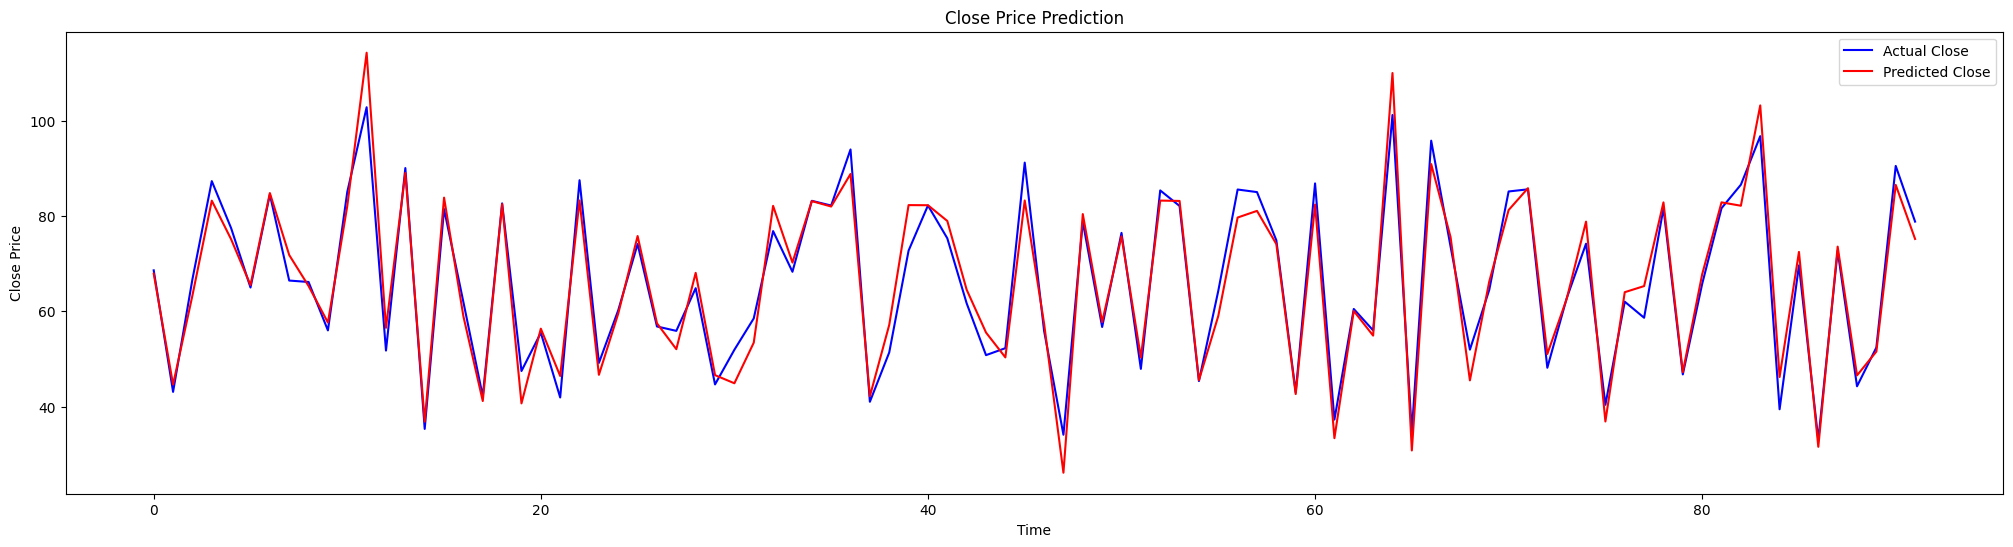

In [77]:
close_index = df_scaled.columns.get_loc("Close") 

plt.figure(figsize=(25, 6))
plt.plot(y_test_rescaled[:, close_index], color='blue', label='Actual Close')
plt.plot(predictions[:, close_index], color='red', label='Predicted Close')
plt.title('Close Price Prediction')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [78]:
rmse = sqrt(mean_squared_error(y_test_rescaled[:,1], predictions[:,1]))
print(rmse)

3.3629764926112635


In [79]:
# Predict 5 future values
def predict_future(model, data, steps, scaler, close_index):
    future_predictions = []
    last_sequence = data[-window_size:]

    for _ in range(steps):
        # Predict the next value
        next_pred = model.predict(last_sequence[np.newaxis, :, :])[0]
        
        # Save the prediction
        future_predictions.append(next_pred)
        
        # Update the sequence with the predicted value
        next_sequence = np.vstack((last_sequence[1:], next_pred))
        last_sequence = next_sequence

    # Inverse transform predictions to original scale
    future_predictions_rescaled = scaler.inverse_transform(future_predictions)
    return future_predictions_rescaled

future_steps = 5
future_close_prices = predict_future(model, df_scaled.values, future_steps, scaler, close_index)

print("Future Close Prices:")
print(future_close_prices[:, close_index])

1/1 [==============================] - 0s 23ms/step
Future Close Prices:
[82.39707381 82.3973076  82.38663749 82.37323992 82.36165267]


In [80]:
from datetime import timedelta

# Function to predict future values
def predict_future(model, data, steps, scaler, window_size):
    future_predictions = []
    last_window = data[-window_size:]

    for _ in range(steps):
        next_pred = model.predict(last_window[np.newaxis, :, :])[0]
        future_predictions.append(next_pred)
        last_window = np.vstack([last_window[1:], next_pred])

    # Rescale predictions to original scale
    future_predictions_rescaled = scaler.inverse_transform(future_predictions)
    return future_predictions_rescaled

# Generate future dates
last_date = df.index[-1]  # Get the last available date in the dataset
future_dates = [last_date + timedelta(weeks=i) for i in range(1, 6)]  # Generate next 5 weeks' dates

# Predict the next 5 weeks
future_steps = 5
future_close_prices = predict_future(model, df_scaled.values, future_steps, scaler, window_size)

# Prepare DataFrame for future predictions
close_index = df.columns.get_loc("Close")
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Close': future_close_prices[:, close_index]
})

# Display the future predictions with dates
print("Future Close Prices with Dates:")
print(future_df)


1/1 [==============================] - 0s 25ms/step
Future Close Prices with Dates:
        Date  Predicted Close
0 2024-09-08        82.397074
1 2024-09-15        82.397308
2 2024-09-22        82.386637
3 2024-09-29        82.373240
4 2024-10-06        82.361653


In [81]:
correlation_matrix = df.corr()
print(correlation_matrix['Close'])


Close                          1.000000
Open                           0.989436
High                           0.994144
Low                            0.995028
Vol.                          -0.143035
ATR                            0.348042
EMA_12                         0.969112
EMA_26                         0.923707
RSI                            0.250195
S&P500_Close                   0.292851
S&P500_ATR                     0.155352
S&P500_EMA_12                  0.304228
S&P500_EMA_26                  0.312042
S&P500_RSI                     0.072314
CBOE_Close                    -0.147577
CBOE_ATR                       0.155352
CBOE_RSI                       0.072314
CBOE_EMA_12                    0.304228
CBOE_EMA_26                    0.312042
USDI_Close                    -0.159041
USDI_ATR                      -0.355671
USDI_EMA_12                   -0.209645
USDI_EMA_26                   -0.244385
USDI_RSI                       0.249705
Weekly_WTI_Contracts          -0.450057
